## Metody Nieparametryczne w Statystyce
# Zadanie 3
Za pomocą odpowiednich symulacji zbadać moc testu Kołmogorowa-Smirnowa w przypadku, gdy rozważane próbki danych pochodzą w rozkładów 𝜒2 o różnej liczbie stopni swobody. Do celów symulacji proszę przesunąć generowane dane tak, by miały tę samą wartość oczekiwaną.
### autor: Maciej Komosa

1. Importowanie potrzebnych bibliotek

In [1]:
import numpy as np, pandas as pd
from scipy.stats import kstest

2. Badanie mocy testu Kołmogorowa-Smirnowa dla dwóch rozkładów o róznej liczbie stopni swobody. *(df rozkładu wektora bazowego - 3)*

<Axes: xlabel='sample size', ylabel='statistical power'>

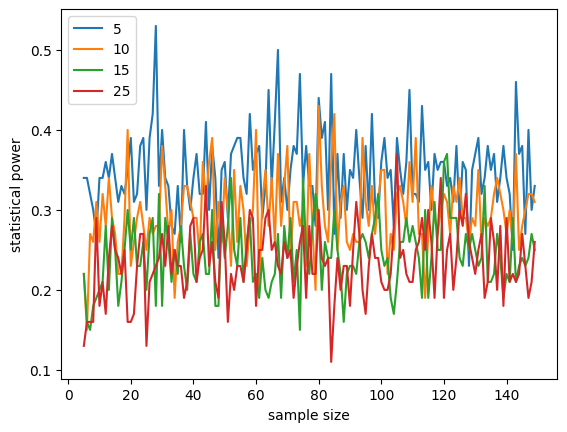

In [2]:
results = pd.DataFrame(columns=['5', '10', '15', '25'])
buf = []

for n in range (5, 150):
    for i in range (0, 100):
        for m in [5, 10, 15, 25]:
            #generowanie dwóch wektorów liczbowych:
            #  - o długości n i 3 stopniach swobody
            #  - o długości n i m stopniach swobody
            x = np.random.chisquare(n, 3)
            xdf = np.random.chisquare(n, m)
            xdf = xdf + (np.mean(x) - np.mean(xdf))
            #testy
            buf.append(kstest(x, xdf)[1] > .95)

    results.loc[n] = [np.mean(buf[0::4]), np.mean(buf[1::4]), np.mean(buf[2::4]), np.mean(buf[3::4])]
    buf.clear()

results.plot(xlabel="sample size", ylabel="statistical power", legend=True)

Jak widać, moc testu zależy w głównej mierze od wybranej liczby stopni swobody, średnie wartości dla każdej z liczb:

In [3]:
print(results.mean())

5     0.348552
10    0.296069
15    0.243931
25    0.235379
dtype: float64
